In [1]:
! pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=dc5c33f94f626947947a751efe77b046e2ba4531ecd66ef0fdb29c535be17ca8
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sns.set()

In [7]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

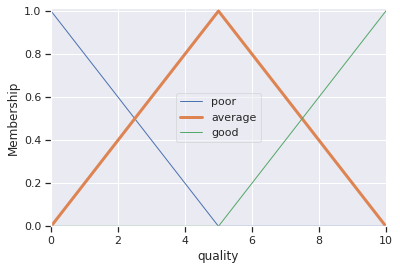

In [8]:
# You can see how these look with .view()
quality['average'].view()

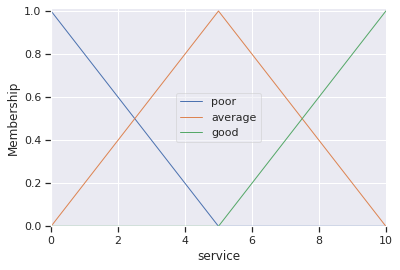

In [9]:
service.view()

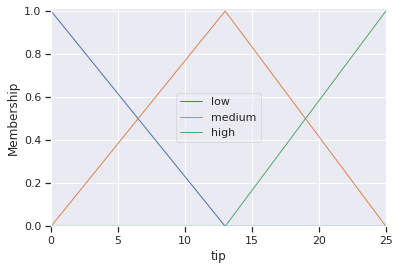

In [10]:
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc51a19a128>)

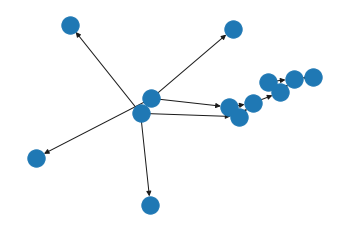

In [11]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()


In [12]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [13]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [14]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


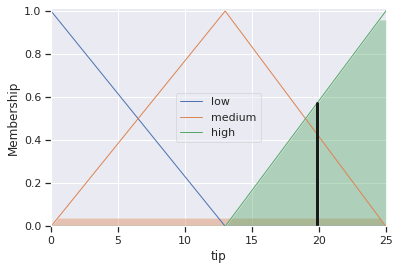

In [16]:
print(tipping.output['tip'])
tip.view(sim=tipping)